In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#läser in parquet-filen
wine=pd.read_parquet('wine_parquet')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [3]:
wine['country']=wine['country'].astype('category')
wine['description']=wine['description'].astype('string')
wine['variety']=wine['variety'].astype('category')
wine['winery']=wine['winery'].astype('category')

In [4]:
#tar bort de kolumner som vi inte är intresserade av i den här analysen
wine=wine.drop(columns=['region_1', 'region_2', 'designation','province'])
#tar bort de rader som saknar land
wine=wine.dropna(subset=['country'])
#tar bort dubeltter
wine=wine.drop_duplicates(keep='first')

In [5]:
#Data cleaning. Kolumnen Price och de med NaN värden plockas bort för prisjämförelserna.
wine=wine.dropna(subset=['price'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89125 entries, 0 to 149639
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   country      89125 non-null  category
 1   description  89125 non-null  string  
 2   points       89125 non-null  int64   
 3   price        89125 non-null  float64 
 4   variety      89125 non-null  category
 5   winery       89125 non-null  category
dtypes: category(3), float64(1), int64(1), string(1)
memory usage: 3.8 MB


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49011/1284243686.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_winesorts=wine.groupby('variety').count().reset_index()


[80.0, 97.0, 87.3864, 87.0] [5.0, 300.0, 24.2944, 20.0]
[80.0, 100.0, 87.91784842586586, 88.0] [4.0, 2300.0, 34.61639941916149, 25.0]
[80.0, 100.0, 87.4819013524264, 87.0] [4.0, 770.0, 27.909108989657916, 20.0]
[80.0, 100.0, 87.31957104557641, 87.0] [5.0, 1000.0, 25.318927613941018, 19.0]
[80.0, 99.0, 88.3755120619026, 88.0] [4.0, 1100.0, 40.082840236686394, 27.0]


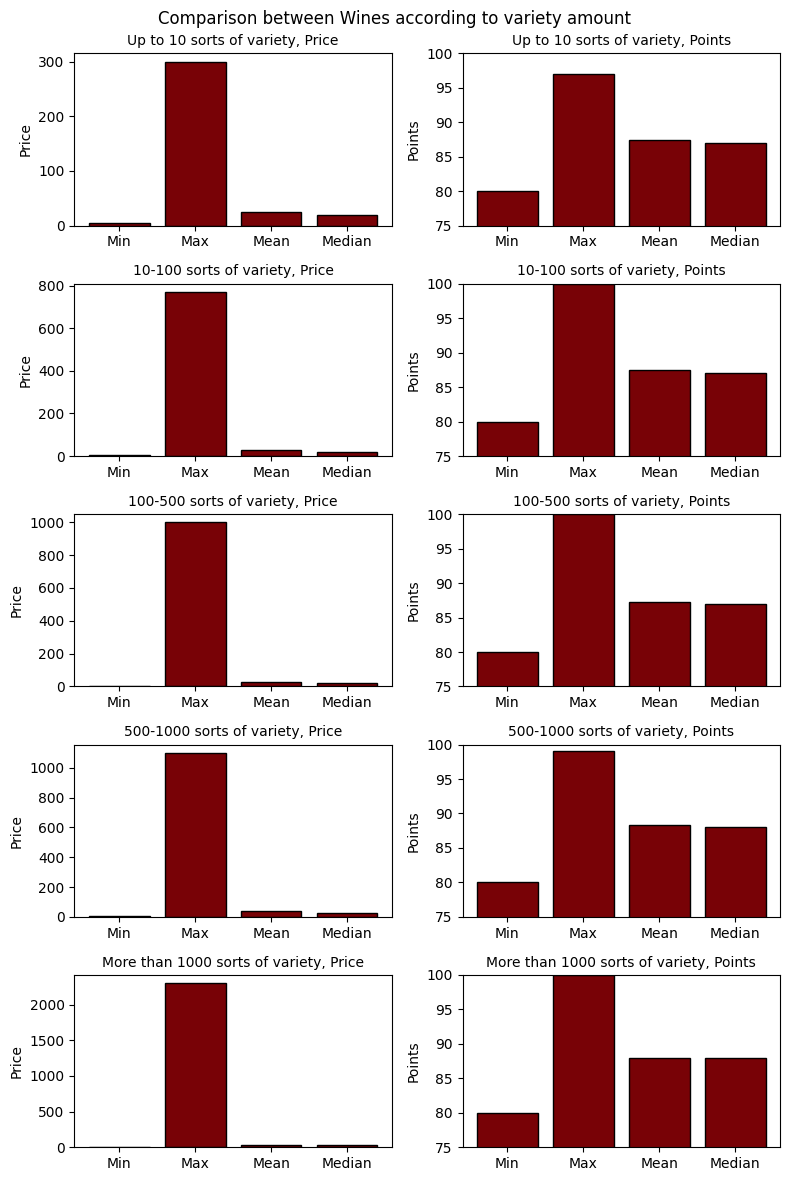

In [6]:
#Diagram 1
#jämförelse mellan vanligt förekommande viner vs mindre vanligt förekommande viner.
grouped_winesorts=wine.groupby('variety').count().reset_index()
most_common_winesorts=grouped_winesorts[grouped_winesorts['country']>=1000]
less_common_winesorts=grouped_winesorts[grouped_winesorts['country']<=10]
winesorts_10_100=grouped_winesorts[(grouped_winesorts['country']>10) & (grouped_winesorts['points']<=100)]
winesorts_100_500=grouped_winesorts[(grouped_winesorts['country']>100) & (grouped_winesorts['points']<=500)]
winesorts_500_1000=grouped_winesorts[(grouped_winesorts['country']>500) & (grouped_winesorts['points']<=1000)]

most_common_wines_df=wine[wine['variety'].isin(most_common_winesorts['variety'])]
less_common_wines_df=wine[wine['variety'].isin(less_common_winesorts['variety'])]
wines_10_100_df=wine[wine['variety'].isin(winesorts_10_100['variety'])]
wines_100_500_df=wine[wine['variety'].isin(winesorts_100_500['variety'])]
wines_500_1000_df=wine[wine['variety'].isin(winesorts_500_1000['variety'])]

most_common_points=most_common_wines_df['points'].agg(['min', 'max', 'median', 'mean'])
most_common_price=most_common_wines_df['price'].agg(['min', 'max', 'median', 'mean'])

less_common_points=less_common_wines_df['points'].agg(['min', 'max', 'median', 'mean'])
less_common_price=less_common_wines_df['price'].agg(['min', 'max', 'median', 'mean'])

points_10_100=wines_10_100_df['points'].agg(['min', 'max', 'median', 'mean'])
price_10_100=wines_10_100_df['price'].agg(['min', 'max', 'median', 'mean'])

points_100_500=wines_100_500_df['points'].agg(['min', 'max', 'median', 'mean'])
price_100_500=wines_100_500_df['price'].agg(['min', 'max', 'median', 'mean'])

points_500_1000=wines_500_1000_df['points'].agg(['min', 'max', 'median', 'mean'])
price_500_1000=wines_500_1000_df['price'].agg(['min', 'max', 'median', 'mean'])

x_positions=['Min','Max','Mean','Median']
less_common_min_osv_price=[less_common_price['min'], less_common_price['max'], less_common_price['mean'], less_common_price['median']]
less_common_min_osv_points=[less_common_points['min'], less_common_points['max'], less_common_points['mean'], less_common_points['median']]

most_common_min_osv_price=[most_common_price['min'], most_common_price['max'], most_common_price['mean'], most_common_price['median']]
most_common_min_osv_points=[most_common_points['min'], most_common_points['max'], most_common_points['mean'], most_common_points['median']]

min_osv_price_10_100=[price_10_100['min'], price_10_100['max'], price_10_100['mean'], price_10_100['median']]
min_osv_points_10_100=[points_10_100['min'], points_10_100['max'], points_10_100['mean'], points_10_100['median']]

min_osv_price_100_500=[price_100_500['min'], price_100_500['max'], price_100_500['mean'], price_100_500['median']]
min_osv_points_100_500=[points_100_500['min'], points_100_500['max'], points_100_500['mean'], points_100_500['median']]

min_osv_price_500_1000=[price_500_1000['min'], price_500_1000['max'], price_500_1000['mean'], price_500_1000['median']]
min_osv_points_500_1000=[points_500_1000['min'], points_500_1000['max'], points_500_1000['mean'], points_500_1000['median']]
print(less_common_min_osv_points, less_common_min_osv_price)
print(most_common_min_osv_points, most_common_min_osv_price)
print(min_osv_points_10_100,min_osv_price_10_100)
print(min_osv_points_100_500,min_osv_price_100_500)
print(min_osv_points_500_1000, min_osv_price_500_1000)

fig, axs=plt.subplots(5,2, figsize=(8,12))

axs[0,0].bar(x_positions, less_common_min_osv_price, color='#780206', edgecolor='black')
axs[0,0].set_title('Up to 10 sorts of variety, Price', fontsize=10)
axs[0,0].set_ylabel('Price')

axs[0,1].bar(x_positions, less_common_min_osv_points, color='#780206', edgecolor='black')
axs[0,1].set_title('Up to 10 sorts of variety, Points', fontsize=10)
axs[0,1].set_ylabel('Points')
axs[0,1].set_ylim(75,100)


axs[1,0].bar(x_positions,min_osv_price_10_100 , color='#780206', edgecolor='black')
axs[1,0].set_title('10-100 sorts of variety, Price', fontsize=10)
axs[1,0].set_ylabel('Price')

axs[1,1].bar(x_positions, min_osv_points_10_100, color='#780206', edgecolor='black')
axs[1,1].set_title('10-100 sorts of variety, Points', fontsize=10)
axs[1,1].set_ylabel('Points')
axs[1,1].set_ylim(75,100)

axs[2,0].bar(x_positions, min_osv_price_100_500, color='#780206', edgecolor='black')
axs[2,0].set_title('100-500 sorts of variety, Price', fontsize=10)
axs[2,0].set_ylabel('Price')

axs[2,1].bar(x_positions, min_osv_points_100_500, color='#780206', edgecolor='black')
axs[2,1].set_title('100-500 sorts of variety, Points', fontsize=10)
axs[2,1].set_ylabel('Points')
axs[2,1].set_ylim(75,100)

axs[3,0].bar(x_positions,min_osv_price_500_1000 , color='#780206', edgecolor='black')
axs[3,0].set_title('500-1000 sorts of variety, Price', fontsize=10)
axs[3,0].set_ylabel('Price')

axs[3,1].bar(x_positions, min_osv_points_500_1000, color='#780206', edgecolor='black')
axs[3,1].set_title('500-1000 sorts of variety, Points', fontsize=10)
axs[3,1].set_ylabel('Points')
axs[3,1].set_ylim(75,100)

axs[4,0].bar(x_positions, most_common_min_osv_price, color='#780206', edgecolor='black')
axs[4,0].set_title('More than 1000 sorts of variety, Price', fontsize=10)
axs[4,0].set_ylabel('Price')

axs[4,1].bar(x_positions, most_common_min_osv_points, color='#780206', edgecolor='black')
axs[4,1].set_title('More than 1000 sorts of variety, Points', fontsize=10)
axs[4,1].set_ylabel('Points')
axs[4,1].set_ylim(75,100)

fig.suptitle('Comparison between Wines according to variety amount')
plt.tight_layout()
plt.savefig("Comparison between Wines, Amount of Varieties.png", bbox_inches=None)

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49011/3087519154.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_stats_price=wine.groupby('country')['price'].agg(['mean', 'median'])


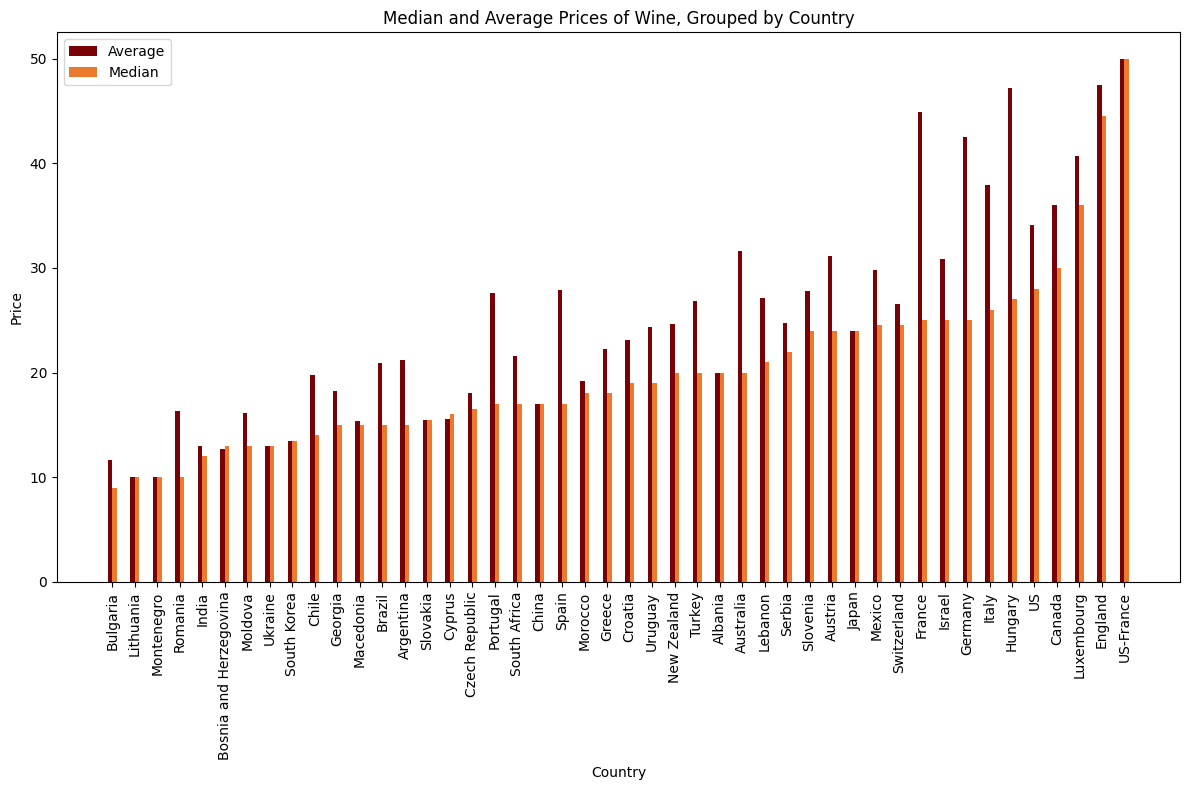

In [7]:
#Diagram 2
#diffar priserna beroende på land.
country_stats_price=wine.groupby('country')['price'].agg(['mean', 'median'])
price_stats_sorted=country_stats_price.sort_values(by='median').reset_index()
price_stats_sorted=price_stats_sorted.dropna()

plt.figure(figsize=(12,8))
countries=price_stats_sorted['country']
bar_width=0.2
index=np.arange(len(price_stats_sorted))

plt.bar(index, price_stats_sorted['mean'], bar_width, label='Average', color='#780206')
plt.bar(index+bar_width, price_stats_sorted['median'], bar_width, label='Median', color='#eb7a2f')
plt.xlabel('Country')
plt.ylabel('Price')
plt.title('Median and Average Prices of Wine, Grouped by Country')
plt.xticks(index+0.5*bar_width, countries, rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("Price median, average by country.png", bbox_inches=None)

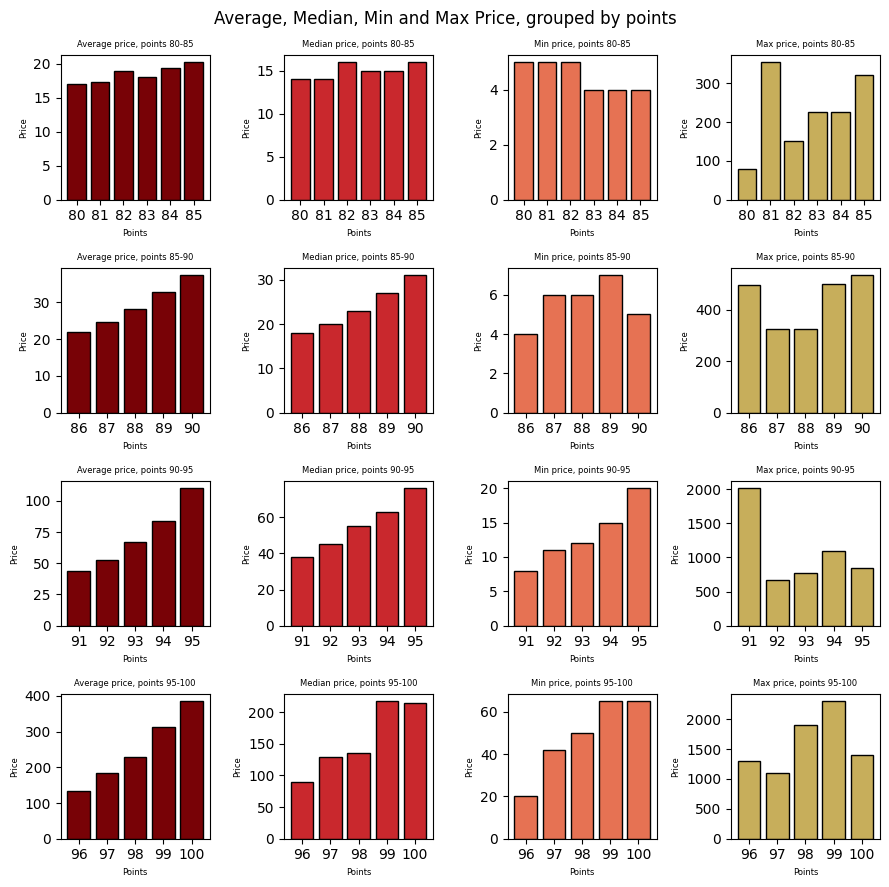

In [8]:
#Diagram 3
#mean, median, min och max pris för alla viner beroende på poäng
price_mean_by_points=wine.groupby('points')['price'].agg('mean')
price_mean_by_points_80_85=price_mean_by_points.loc[price_mean_by_points.index<=85]
price_mean_by_points_85_90=price_mean_by_points.loc[(price_mean_by_points.index>85) &(price_mean_by_points.index<=90)]
price_mean_by_points_90_95=price_mean_by_points.loc[(price_mean_by_points.index>90) &(price_mean_by_points.index<=95)]
price_mean_by_points_95_100=price_mean_by_points.loc[(price_mean_by_points.index>95) &(price_mean_by_points.index<=100)]

price_median_by_points=wine.groupby('points')['price'].agg('median')
price_median_by_points_80_85=price_median_by_points.loc[price_median_by_points.index<=85]
price_median_by_points_85_90=price_median_by_points.loc[(price_median_by_points.index>85) &(price_median_by_points.index<=90)]
price_median_by_points_90_95=price_median_by_points.loc[(price_median_by_points.index>90) &(price_median_by_points.index<=95)]
price_median_by_points_95_100=price_median_by_points.loc[(price_median_by_points.index>95) &(price_median_by_points.index<=100)]

price_min_by_points=wine.groupby('points')['price'].agg('min')
price_min_by_points_80_85=price_min_by_points.loc[price_min_by_points.index<=85]
price_min_by_points_85_90=price_min_by_points.loc[(price_min_by_points.index>85) &(price_min_by_points.index<=90)]
price_min_by_points_90_95=price_min_by_points.loc[(price_min_by_points.index>90) &(price_min_by_points.index<=95)]
price_min_by_points_95_100=price_min_by_points.loc[(price_min_by_points.index>95) &(price_min_by_points.index<=100)]

price_max_by_points=wine.groupby('points')['price'].agg('max')
price_max_by_points_80_85=price_max_by_points.loc[price_max_by_points.index<=85]
price_max_by_points_85_90=price_max_by_points.loc[(price_max_by_points.index>85) &(price_max_by_points.index<=90)]
price_max_by_points_90_95=price_max_by_points.loc[(price_max_by_points.index>90) &(price_max_by_points.index<=95)]
price_max_by_points_95_100=price_max_by_points.loc[(price_max_by_points.index>95) &(price_max_by_points.index<=100)]

x_positions_80=['80','81','82','83','84','85']
x_positions_85=['86','87','88','89','90']
x_positions_90=['91','92','93','94','95']
x_positions_95=['96','97','98','99','100']

fig, axs=plt.subplots(4,4, figsize=(9,9))

axs[0,0].bar(x_positions_80, price_mean_by_points_80_85, color='#780206', edgecolor='black')
axs[0,0].set_title('Average price, points 80-85', fontsize=6)
axs[0,0].set_xlabel('Points', fontsize=6)
axs[0,0].set_ylabel('Price', fontsize=6)

axs[0,1].bar(x_positions_80, price_median_by_points_80_85, color='#c9282d', edgecolor='black')
axs[0,1].set_title('Median price, points 80-85', fontsize=6)
axs[0,1].set_xlabel('Points', fontsize=6)
axs[0,1].set_ylabel('Price', fontsize=6)

axs[0,2].bar(x_positions_80, price_min_by_points_80_85, color='#e67253', edgecolor='black')
axs[0,2].set_title('Min price, points 80-85', fontsize=6)
axs[0,2].set_xlabel('Points', fontsize=6)
axs[0,2].set_ylabel('Price', fontsize=6)

axs[0,3].bar(x_positions_80, price_max_by_points_80_85, color='#c7ae5b', edgecolor='black')
axs[0,3].set_title('Max price, points 80-85', fontsize=6)
axs[0,3].set_xlabel('Points', fontsize=6)
axs[0,3].set_ylabel('Price', fontsize=6)

axs[1,0].bar(x_positions_85, price_mean_by_points_85_90, color='#780206', edgecolor='black')
axs[1,0].set_title('Average price, points 85-90', fontsize=6)
axs[1,0].set_xlabel('Points', fontsize=6)
axs[1,0].set_ylabel('Price', fontsize=6)

axs[1,1].bar(x_positions_85, price_median_by_points_85_90, color='#c9282d', edgecolor='black')
axs[1,1].set_title('Median price, points 85-90', fontsize=6)
axs[1,1].set_xlabel('Points', fontsize=6)
axs[1,1].set_ylabel('Price', fontsize=6)

axs[1,2].bar(x_positions_85, price_min_by_points_85_90, color='#e67253', edgecolor='black')
axs[1,2].set_title('Min price, points 85-90', fontsize=6)
axs[1,2].set_xlabel('Points', fontsize=6)
axs[1,2].set_ylabel('Price', fontsize=6)

axs[1,3].bar(x_positions_85, price_max_by_points_85_90, color='#c7ae5b', edgecolor='black')
axs[1,3].set_title('Max price, points 85-90', fontsize=6)
axs[1,3].set_xlabel('Points', fontsize=6)
axs[1,3].set_ylabel('Price', fontsize=6)

axs[2,0].bar(x_positions_90, price_mean_by_points_90_95, color='#780206', edgecolor='black')
axs[2,0].set_title('Average price, points 90-95', fontsize=6)
axs[2,0].set_xlabel('Points', fontsize=6)
axs[2,0].set_ylabel('Price', fontsize=6)

axs[2,1].bar(x_positions_90, price_median_by_points_90_95, color='#c9282d', edgecolor='black')
axs[2,1].set_title('Median price, points 90-95', fontsize=6)
axs[2,1].set_xlabel('Points', fontsize=6)
axs[2,1].set_ylabel('Price', fontsize=6)

axs[2,2].bar(x_positions_90, price_min_by_points_90_95, color='#e67253', edgecolor='black')
axs[2,2].set_title('Min price, points 90-95', fontsize=6)
axs[2,2].set_xlabel('Points', fontsize=6)
axs[2,2].set_ylabel('Price', fontsize=6)

axs[2,3].bar(x_positions_90, price_max_by_points_90_95, color='#c7ae5b', edgecolor='black')
axs[2,3].set_title('Max price, points 90-95', fontsize=6)
axs[2,3].set_xlabel('Points', fontsize=6)
axs[2,3].set_ylabel('Price', fontsize=6)

axs[3,0].bar(x_positions_95, price_mean_by_points_95_100, color='#780206', edgecolor='black')
axs[3,0].set_title('Average price, points 95-100', fontsize=6)
axs[3,0].set_xlabel('Points', fontsize=6)
axs[3,0].set_ylabel('Price', fontsize=6)

axs[3,1].bar(x_positions_95, price_median_by_points_95_100, color='#c9282d', edgecolor='black')
axs[3,1].set_title('Median price, points 95-100', fontsize=6)
axs[3,1].set_xlabel('Points', fontsize=6)
axs[3,1].set_ylabel('Price', fontsize=6)

axs[3,2].bar(x_positions_95, price_min_by_points_95_100, color='#e67253', edgecolor='black')
axs[3,2].set_title('Min price, points 95-100', fontsize=6)
axs[3,2].set_xlabel('Points', fontsize=6)
axs[3,2].set_ylabel('Price', fontsize=6)

axs[3,3].bar(x_positions_95, price_max_by_points_95_100, color='#c7ae5b', edgecolor='black')
axs[3,3].set_title('Max price, points 95-100', fontsize=6)
axs[3,3].set_xlabel('Points', fontsize=6)
axs[3,3].set_ylabel('Price', fontsize=6)

fig.suptitle('Average, Median, Min and Max Price, grouped by points')
plt.tight_layout()
plt.savefig("Mean Median Min Max, grouped by points.png", bbox_inches=None)

In [9]:
#ta bort de vinsorter som har färre än 5 reviews.
wine_reviews_counts=wine.groupby('variety').size()
valid_wines_more_than_5= wine_reviews_counts[wine_reviews_counts>5].index.tolist()
more_than_5_reviews=wine[wine['variety'].isin(valid_wines_more_than_5)]
more_than_5_reviews

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49011/2452566283.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_reviews_counts=wine.groupby('variety').size()


,country,description,points,price,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...
149634,France,Atypically light in body and reticent on the n...,84,15.0,Gewürztraminer,W. Gisselbrecht
149635,US,A Syrah-Grenache blend that's dry and rustical...,84,15.0,Syrah-Grenache,Casa Barranca
149637,US,"Outside of the vineyard, wines like this are w...",84,6.0,Merlot,Delicato
149638,Argentina,"Heavy and basic, with melon and pineapple arom...",84,9.0,Sauvignon Blanc,Finca El Portillo


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49011/111057176.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_5=more_than_5_reviews.groupby('variety')[['points', 'price']].mean().reset_index()


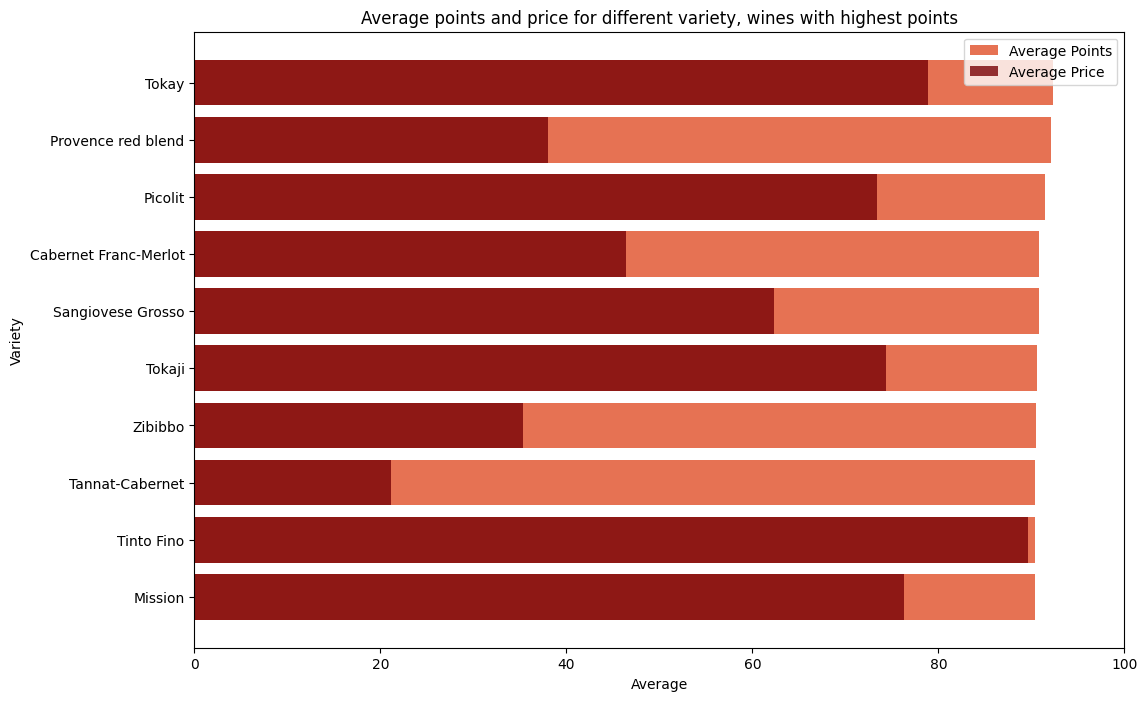

In [10]:
#Diagram 4
#Hur ser medelpris och medelpoäng ut för de viner som har högsta medelpoängen, viner med minst 5 varianter?
grouped_by_5=more_than_5_reviews.groupby('variety')[['points', 'price']].mean().reset_index()
sorted_by_5_highest_points=grouped_by_5.sort_values(by='points', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(sorted_by_5_highest_points['variety'][:10], sorted_by_5_highest_points['points'][:10], color='#e67253', label='Average Points')
plt.barh(sorted_by_5_highest_points['variety'][:10], sorted_by_5_highest_points['price'][:10], color='#780206', alpha=0.8, label='Average Price')
plt.xlabel('Average')
plt.ylabel('Variety')
plt.title('Average points and price for different variety, wines with highest points')
plt.legend()
plt.xlim(0,100)
plt.gca().invert_yaxis() #visar den högsta poängen högst upp
#plt.savefig('top 10 wines filter.png', bbox_inches=None)

(0.0, 100.0)

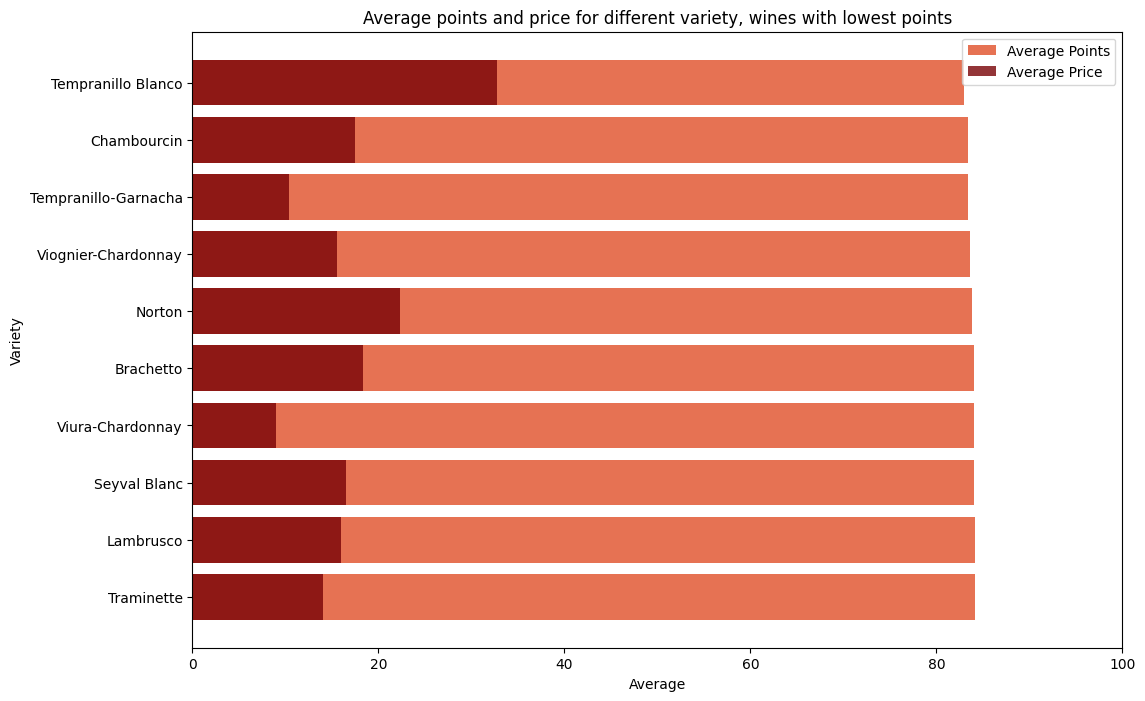

In [11]:
#Diagram 5
#diagram för de viner med minst 5 reviews med lägst betyg. Betyg och pris ska visas.
sorted_by_5_lowest_points=grouped_by_5.sort_values(by='points', ascending=True)
plt.figure(figsize=(12,8))
plt.barh(sorted_by_5_lowest_points['variety'][:10], sorted_by_5_lowest_points['points'][:10], color='#e67253', label='Average Points')
plt.barh(sorted_by_5_lowest_points['variety'][:10], sorted_by_5_lowest_points['price'][:10], color='#780206', alpha=0.8, label='Average Price')
plt.xlabel('Average')
plt.ylabel('Variety')
plt.title('Average points and price for different variety, wines with lowest points')
plt.legend()
plt.gca().invert_yaxis() #visar den högsta poängen högst upp
plt.xlim(0,100) #för att sätta gränserna på x-axeln
#plt.savefig('bottom 10 wines filter.png', bbox_inches=None) 

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49011/3864224934.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wine_ranking_price_grouped= wine.groupby('variety')[['points', 'price']].mean().reset_index()


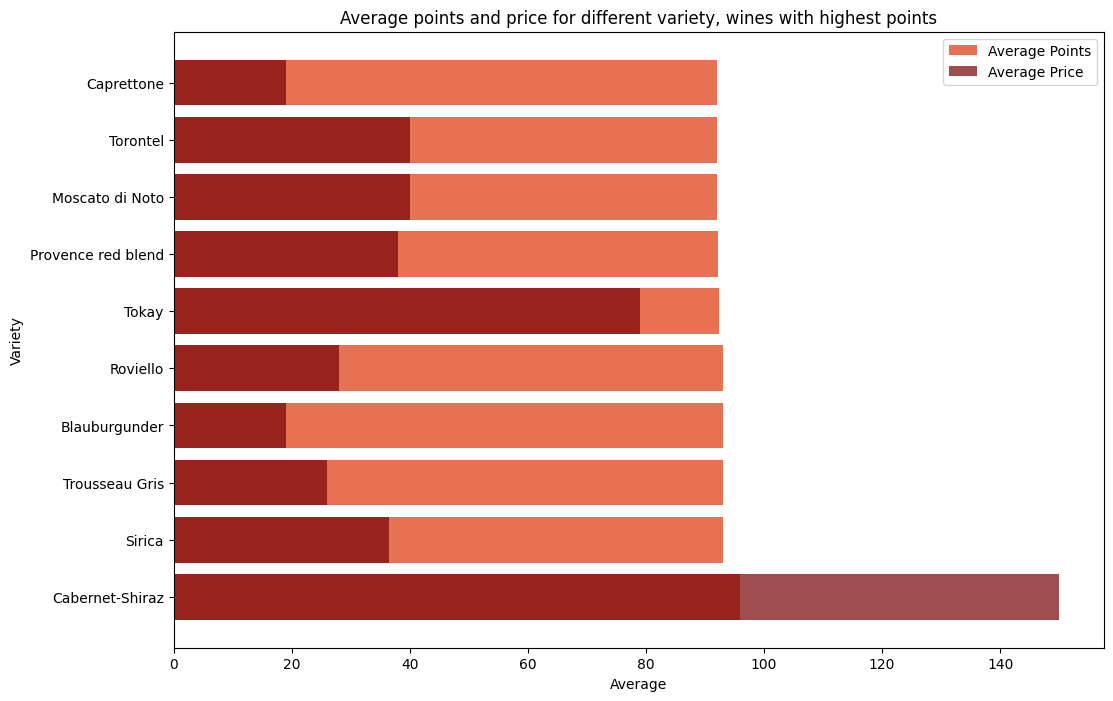

In [12]:
#Diagram 6
#Hur viner är fördelade mellan ranking på druvor och pris. Alla viner
wine_ranking_price_grouped= wine.groupby('variety')[['points', 'price']].mean().reset_index()
sorted_wine_points_price_highest=wine_ranking_price_grouped.sort_values(by='points', ascending=False)

plt.figure(figsize=(12,8))
plt.barh(sorted_wine_points_price_highest['variety'][:10], sorted_wine_points_price_highest['points'][:10], color='#e67253', label='Average Points')
plt.barh(sorted_wine_points_price_highest['variety'][:10], sorted_wine_points_price_highest['price'][:10], color='#780206', alpha=0.7, label='Average Price')
plt.xlabel('Average')
plt.ylabel('Variety')
plt.title('Average points and price for different variety, wines with highest points')
plt.legend()
plt.savefig('top 10 wines no filter.png', bbox_inches=None)

(0.0, 140.0)

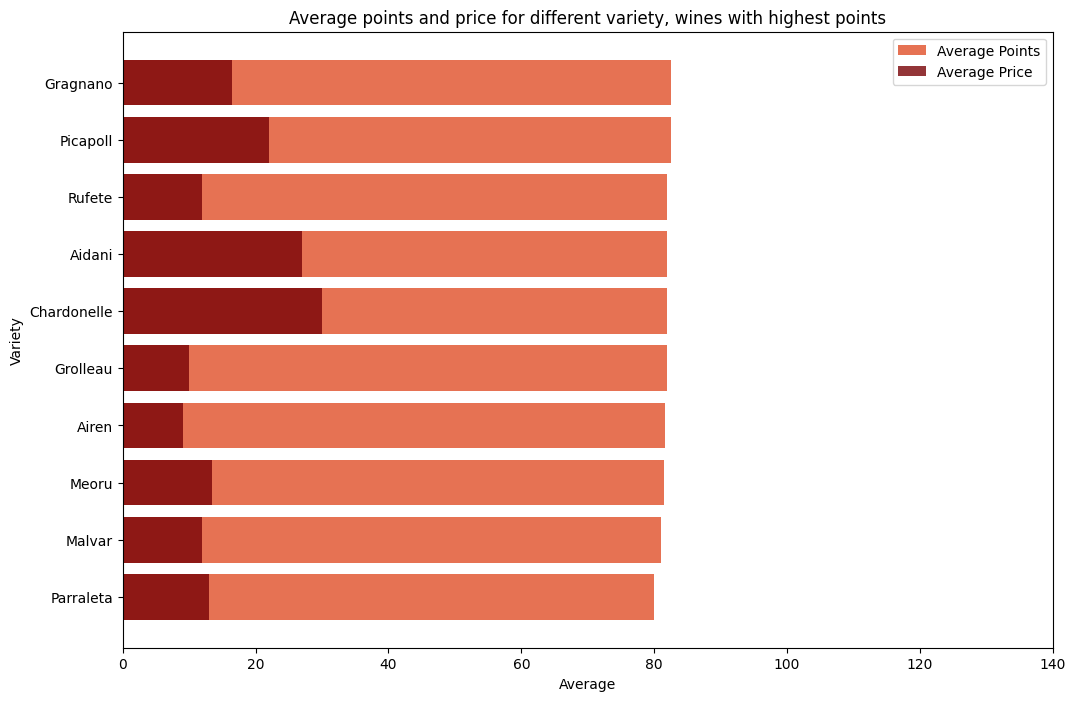

In [13]:
#Diagram 7
#Hur viner är fördelade mellan ranking på druvor och pris. Alla viner
sorted_wine_points_price_lowest=wine_ranking_price_grouped.sort_values(by='points', ascending=True)

plt.figure(figsize=(12,8))
plt.barh(sorted_wine_points_price_lowest['variety'][:10], sorted_wine_points_price_lowest['points'][:10], color='#e67253', label='Average Points')
plt.barh(sorted_wine_points_price_lowest['variety'][:10], sorted_wine_points_price_lowest['price'][:10], color='#780206', alpha=0.8, label='Average Price')
plt.xlabel('Average')
plt.ylabel('Variety')
plt.title('Average points and price for different variety, wines with highest points')
plt.legend()
plt.xlim(0,140)
#plt.savefig('bottom 10 wines no filter.png', bbox_inches=None)

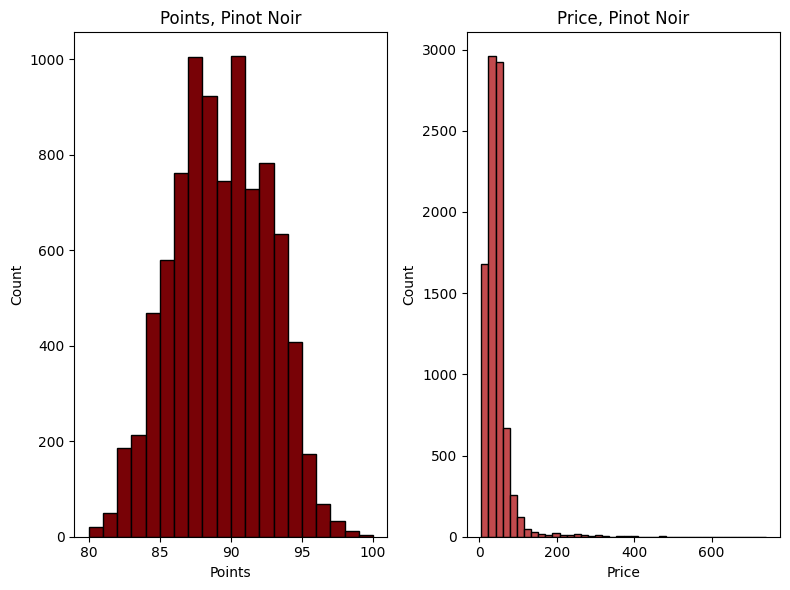

In [14]:
#Diagram 8
#De vanligast förekommande vinerna
#Pinot Noir med pris och poäng
pinot_noir= wine[wine['variety']=='Pinot Noir']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(pinot_noir['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Pinot Noir')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(pinot_noir['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Pinot Noir')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Pinot Noir hist.png", bbox_inches=None)

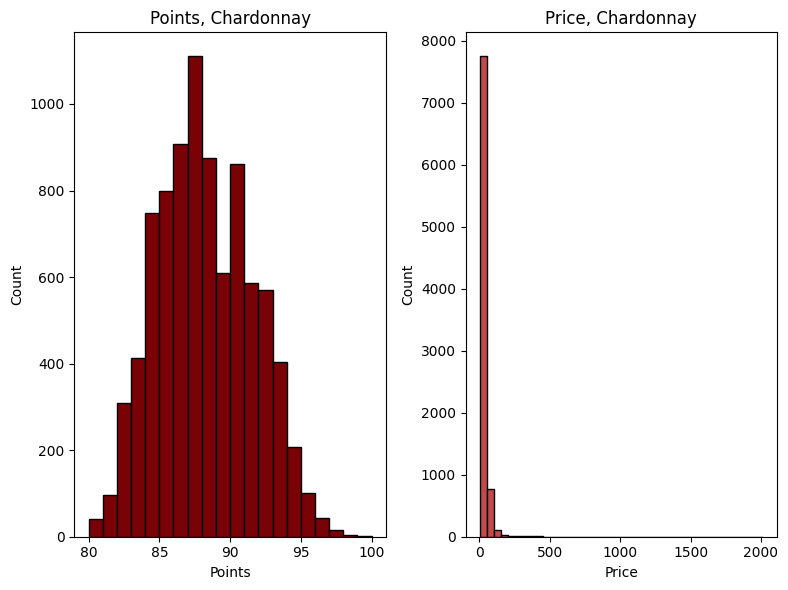

In [28]:
#Diagram 9
#De vanligast förekommande vinerna
#Chardonnay med pris och poäng
chardonnay= wine[wine['variety']=='Chardonnay']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(chardonnay['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Chardonnay')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(chardonnay['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Chardonnay')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Chardonnay hist.png", bbox_inches=None)

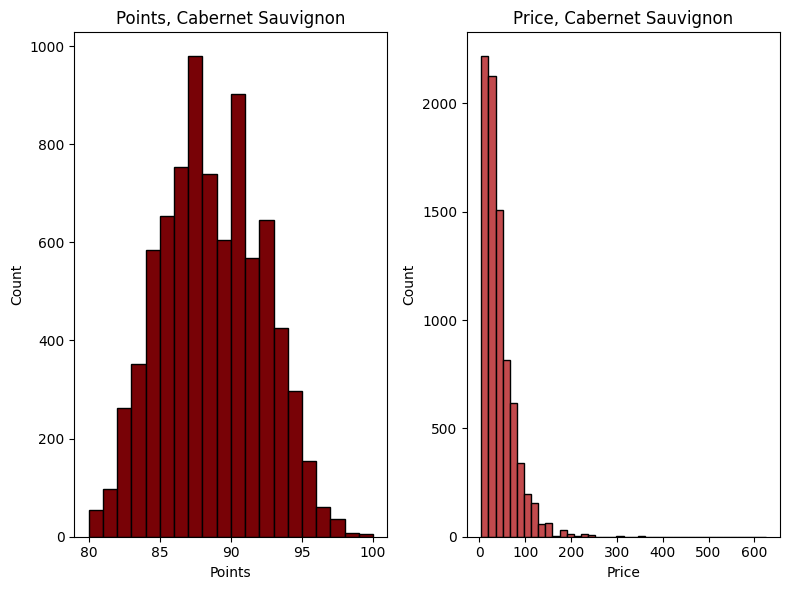

In [29]:
#Diagram 10
#De vanligast förekommande vinerna
#Cabernet Sauvignon med pris och poäng
cabernet_sauvignon= wine[wine['variety']=='Cabernet Sauvignon']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(cabernet_sauvignon['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Cabernet Sauvignon')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(cabernet_sauvignon['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Cabernet Sauvignon')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Cabernet Sauvignon hist.png", bbox_inches=None)

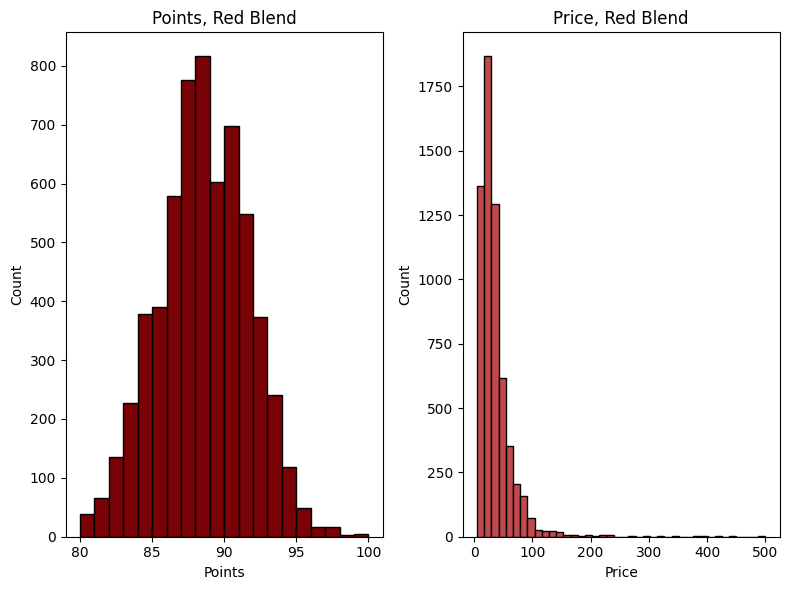

In [30]:
#Diagram 11
#De vanligast förekommande vinerna
#Red Blend med pris och poäng
red_blend= wine[wine['variety']=='Red Blend']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(red_blend['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Red Blend')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(red_blend['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Red Blend')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Red Blend hist.png", bbox_inches=None)

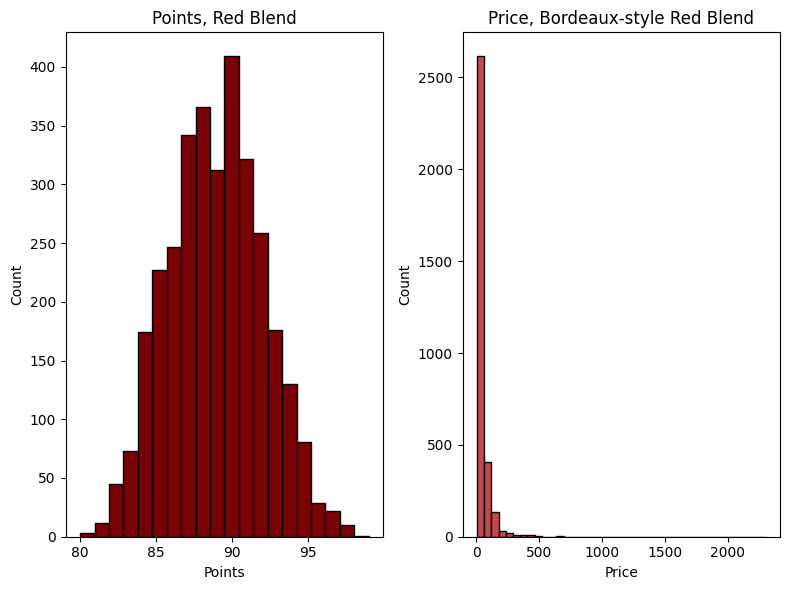

In [31]:
#Diagram 12
#De vanligast förekommande vinerna
#Bordeaux-style Red Blend med pris och poäng
b_red_blend= wine[wine['variety']=='Bordeaux-style Red Blend']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(b_red_blend['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Red Blend')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(b_red_blend['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Bordeaux-style Red Blend')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Bordeaux-style Red Blend hist.png", bbox_inches=None)

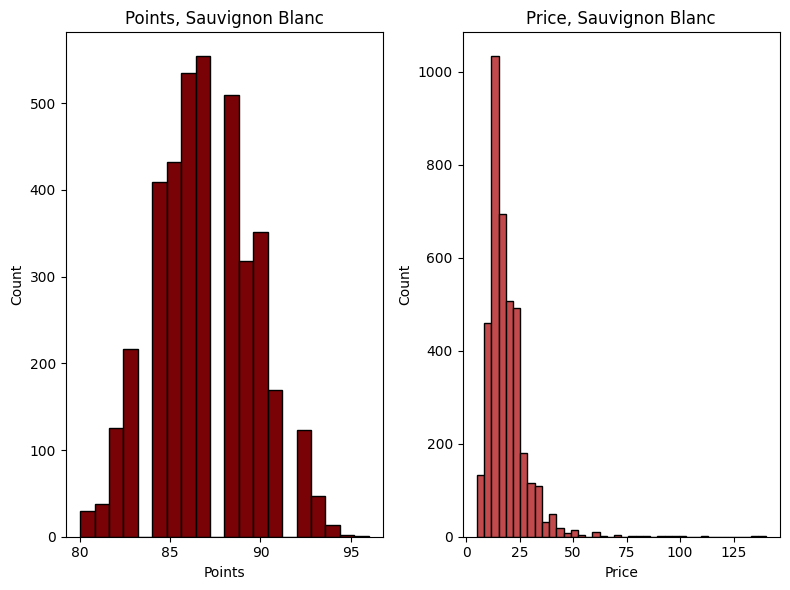

In [32]:
#Diagram 13
#De vanligast förekommande vinerna
#Sauvignon Blanc med pris och poäng
sauvignon_blanc= wine[wine['variety']=='Sauvignon Blanc']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(sauvignon_blanc['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Sauvignon Blanc')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(sauvignon_blanc['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Sauvignon Blanc')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Sauvignon Blanc hist.png", bbox_inches=None)

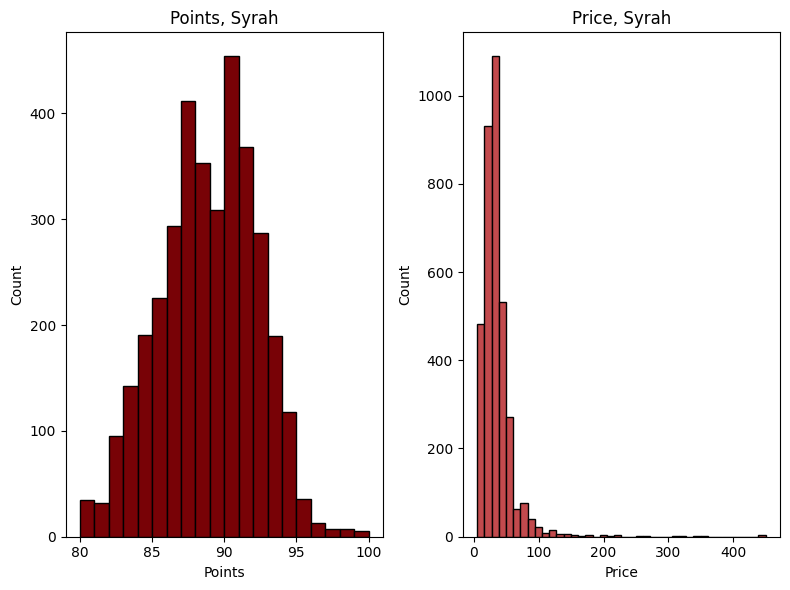

In [33]:
#Diagram 14
#De vanligast förekommande vinerna
#Syrah med pris och poäng
syrah= wine[wine['variety']=='Syrah']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(syrah['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Syrah')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(syrah['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Syrah')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Syrah hist.png", bbox_inches=None)

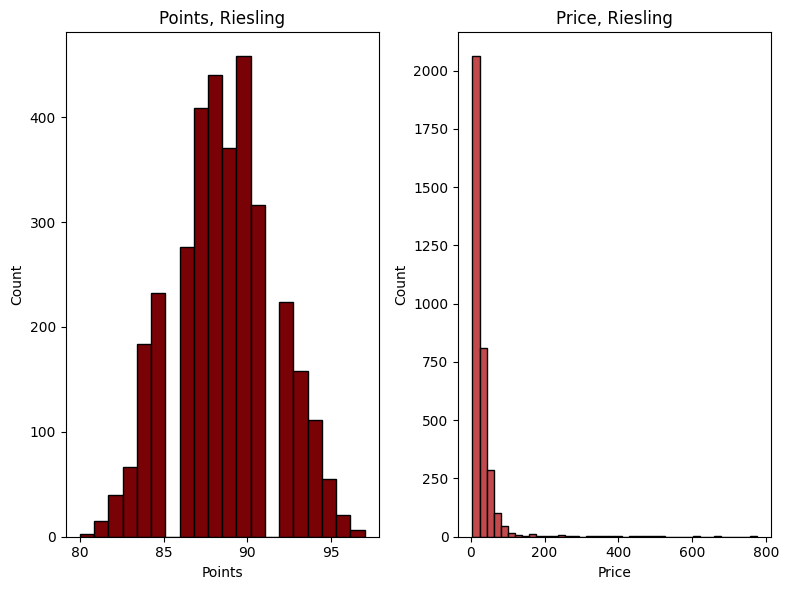

In [34]:
#Diagram 15
#De vanligast förekommande vinerna
#Riesling med pris och poäng
riesling= wine[wine['variety']=='Riesling']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(riesling['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Riesling')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(riesling['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Riesling')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Riesling hist.png", bbox_inches=None)

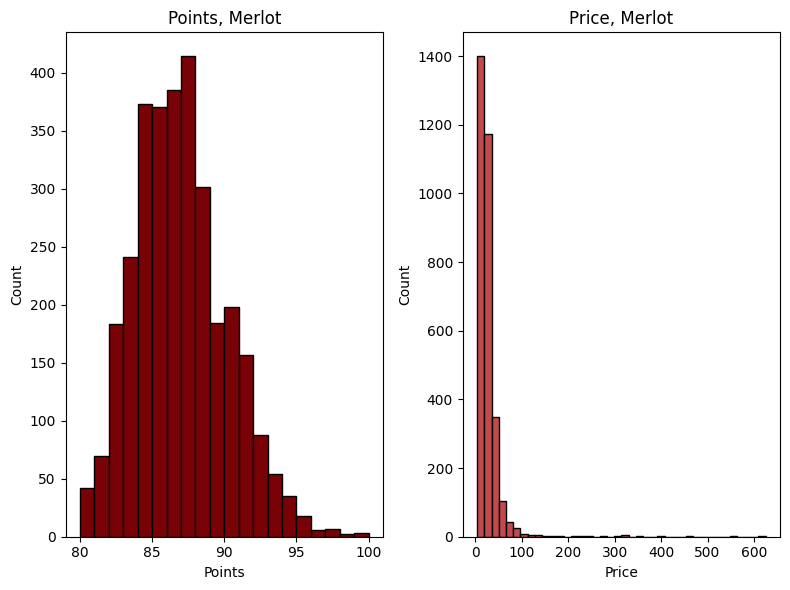

In [35]:
#Diagram 16
#De vanligast förekommande vinerna
#Merlot med pris och poäng
merlot= wine[wine['variety']=='Merlot']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(merlot['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Merlot')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(merlot['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Merlot')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Merlot hist.png", bbox_inches=None)

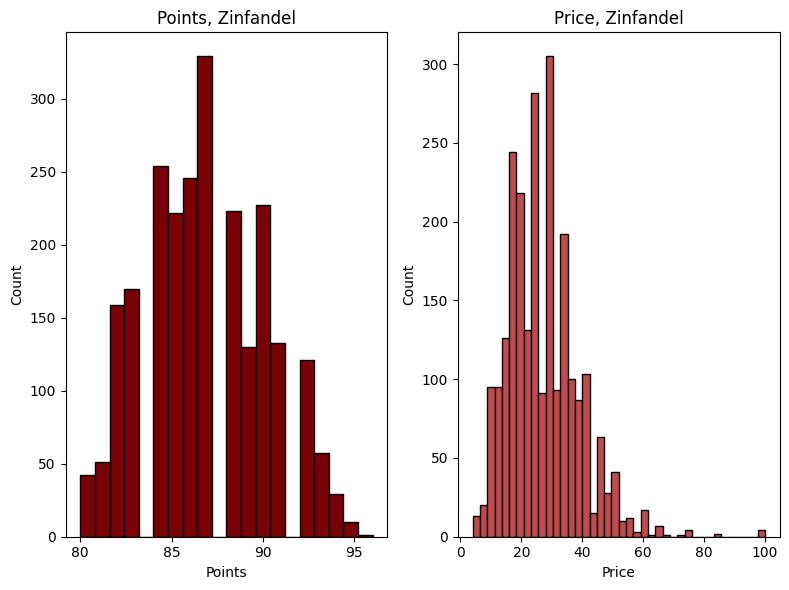

In [36]:
#Diagram 17
#De vanligast förekommande vinerna
#Zinfandel med pris och poäng
zinfandel= wine[wine['variety']=='Zinfandel']
fig, axs=plt.subplots(1,2, figsize=(8,6))

axs[0].hist(zinfandel['points'], bins=20, color='#780206', edgecolor='black')
axs[0].set_title('Points, Zinfandel')
axs[0].set_xlabel('Points')
axs[0].set_ylabel('Count')


axs[1].hist(zinfandel['price'], bins=40, color='#c24a4d', edgecolor='black')
axs[1].set_title('Price, Zinfandel')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Count')

plt.tight_layout()
#plt.savefig("Zinfandel hist.png", bbox_inches=None)

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_49011/1712939386.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_expensive_wines_grouped= most_expensive_wines.groupby('country')['price'].count().reset_index()


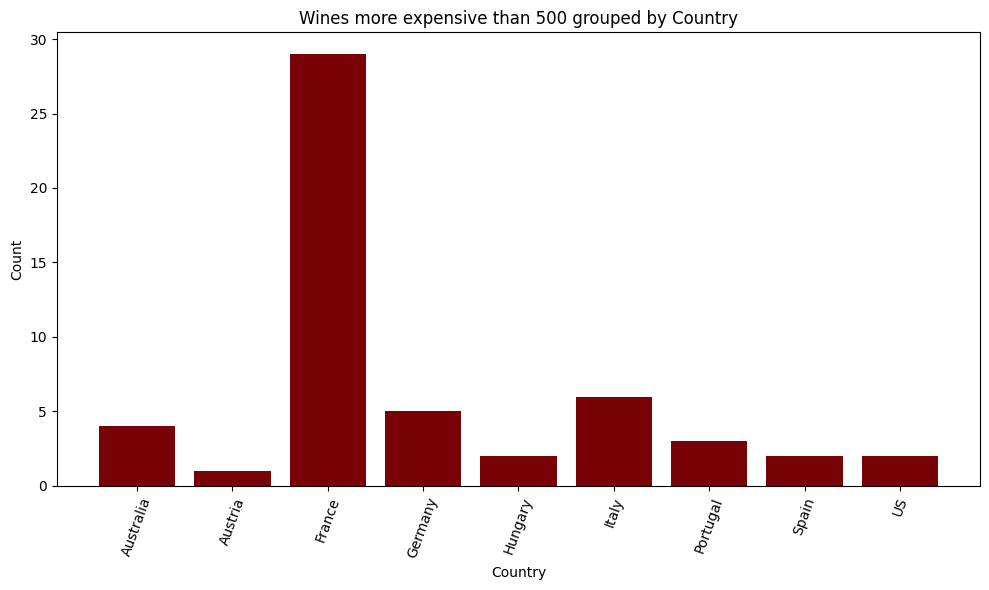

In [15]:
#Diagram 18
#viner dyrare än 500 grupperat per land.
most_expensive_wines= wine[wine['price']>500]
most_expensive_wines_grouped= most_expensive_wines.groupby('country')['price'].count().reset_index()
most_expensive_wines_grouped=most_expensive_wines_grouped[most_expensive_wines_grouped['price']!=0]

plt.figure(figsize=(10,6))
plt.bar(most_expensive_wines_grouped['country'], most_expensive_wines_grouped['price'], color='#780206')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Wines more expensive than 500 grouped by Country')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("More expensive than 500.png", bbox_inches=None)

48


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/769559768.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_only_5_grouped_points=most_common_only_5.groupby(['country', 'variety'])['points'].mean().reset_index()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/769559768.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_only_5_grouped_price=most_common_only_5.groupby(['country', 'variety'])['price'].median().reset_index()


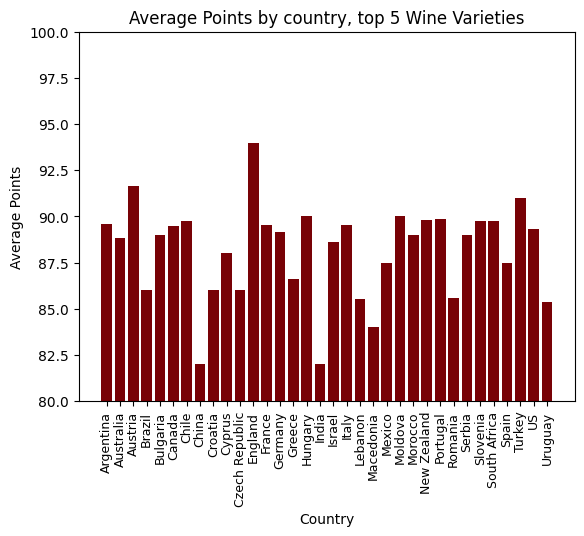

In [18]:
#Diagram 19
#diffar poängen beroende på land och sort, analys av de 5 vanligaste?
wine=pd.read_parquet('wine_parquet')
wine['country']=wine['country'].astype('category')
print(wine['country'].nunique())
most_common_5=wine['variety'].value_counts()
most_common_5.head()
most_common_only_5=wine[(wine['variety']=='Chardonnay') |(wine['variety']=='Pinot Noir')| (wine['variety']=='Cabernet Sauvignon') |(wine['variety']=='Red Blend')|(wine['variety']=='Bordeaux-style Red Blend')]
most_common_only_5_grouped_points=most_common_only_5.groupby(['country', 'variety'])['points'].mean().reset_index()
most_common_only_5_grouped_price=most_common_only_5.groupby(['country', 'variety'])['price'].median().reset_index()
most_common_only_5_grouped_points=most_common_only_5_grouped_points.dropna()
most_common_only_5_grouped_price=most_common_only_5_grouped_price.dropna()

plt.bar(most_common_only_5_grouped_points['country'],most_common_only_5_grouped_points['points'],color='#780206' )
plt.title('Average Points by country, top 5 Wine Varieties')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.xticks(rotation=90, fontsize=9)
plt.ylim(80,100)
plt.show()


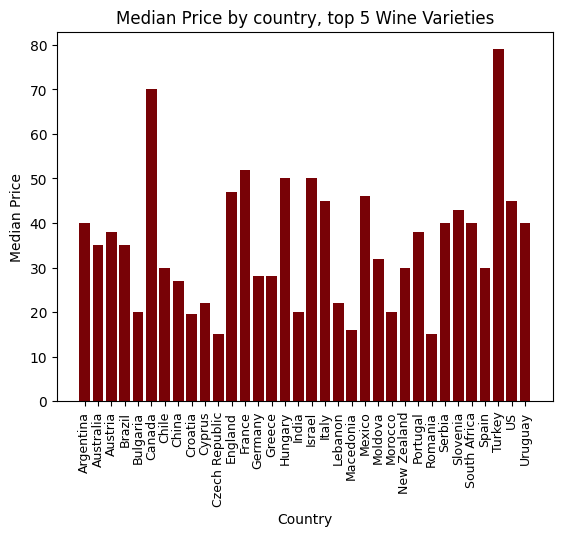

In [19]:
#Diagram 20
#diffar priserna beroende på land och sort, kolla de 5 vanligaste?
plt.bar(most_common_only_5_grouped_price['country'],most_common_only_5_grouped_price['price'],color='#780206')
plt.title('Median Price by country, top 5 Wine Varieties')
plt.xlabel('Country')
plt.ylabel('Median Price')
plt.xticks(rotation=90, fontsize=9)
plt.show()


/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/1058407444.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_pinot_noir_grouped_points=most_common_pinot_noir.groupby(['country', 'variety'])['points'].mean().reset_index()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/1058407444.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_pinot_noir_grouped_price=most_common_pinot_noir.groupby(['country', 'variety'])['price'].mean().reset_index()


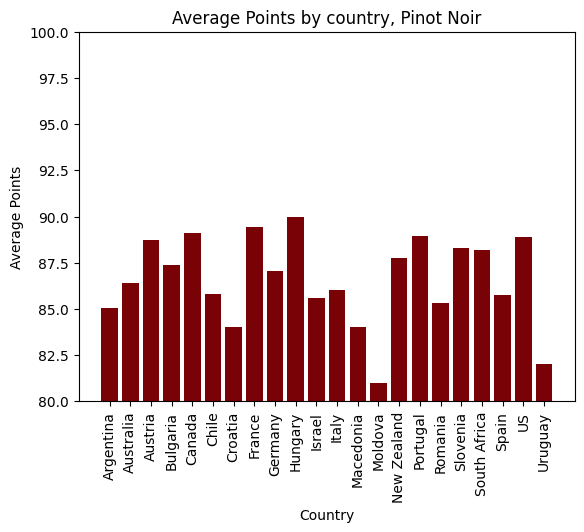

In [21]:
#Diagram 21
# Diffar poäng beroende på land för de 5 vanligaste, 1.Pinot Noir
most_common_pinot_noir=wine[(wine['variety']=='Pinot Noir')]
most_common_pinot_noir_grouped_points=most_common_pinot_noir.groupby(['country', 'variety'])['points'].mean().reset_index()
most_common_pinot_noir_grouped_price=most_common_pinot_noir.groupby(['country', 'variety'])['price'].mean().reset_index()
most_common_pinot_noir_grouped_points=most_common_pinot_noir_grouped_points.dropna()
most_common_pinot_noir_grouped_price=most_common_pinot_noir_grouped_price.dropna()
plt.bar(most_common_pinot_noir_grouped_points['country'],most_common_pinot_noir_grouped_points['points'],color='#780206')
plt.title('Average Points by country, Pinot Noir')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.ylim(80,100)
plt.show()

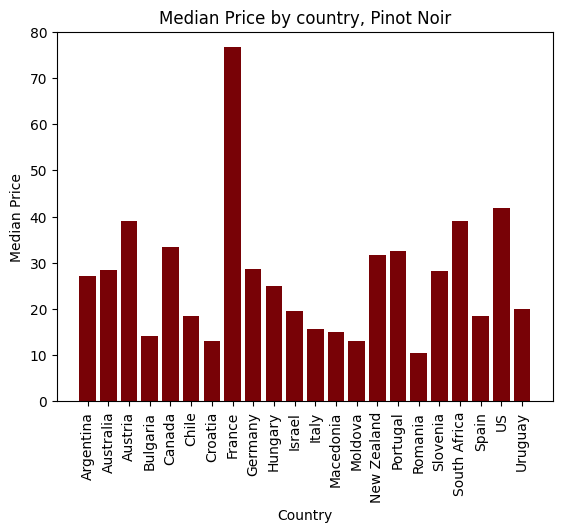

In [22]:
#Diagram 22
# Diffar pris beroende på land för de 5 vanligaste, 1.Pinot Noir
plt.bar(most_common_pinot_noir_grouped_price['country'],most_common_pinot_noir_grouped_price['price'],color='#780206')
plt.title('Median Price by country, Pinot Noir')
plt.xlabel('Country')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.ylim(0,80)
plt.show()

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/2168392432.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_chardonnay_grouped_points=most_common_chardonnay.groupby(['country', 'variety'])['points'].mean().reset_index()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/2168392432.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_chardonnay_grouped_price=most_common_chardonnay.groupby(['country', 'variety'])['price'].median().reset_index()


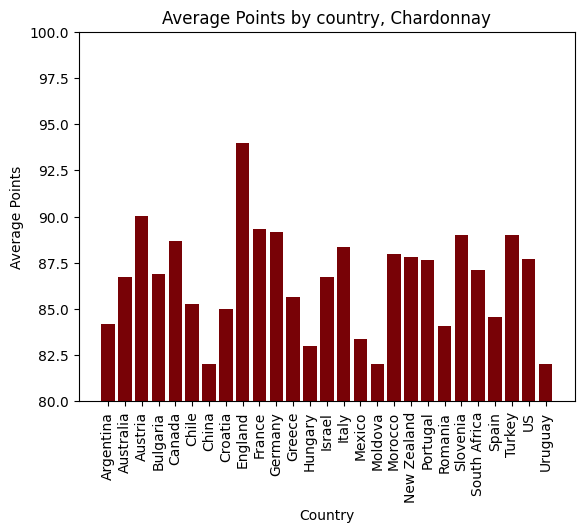

In [23]:
#Diagram 23
# Diffar poäng beroende på land för de 5 vanligaste, 2.Chardonnay
most_common_chardonnay=wine[(wine['variety']=='Chardonnay')]
most_common_chardonnay_grouped_points=most_common_chardonnay.groupby(['country', 'variety'])['points'].mean().reset_index()
most_common_chardonnay_grouped_price=most_common_chardonnay.groupby(['country', 'variety'])['price'].median().reset_index()
most_common_chardonnay_grouped_points=most_common_chardonnay_grouped_points.dropna()
most_common_chardonnay_grouped_price=most_common_chardonnay_grouped_price.dropna()
plt.bar(most_common_chardonnay_grouped_points['country'],most_common_chardonnay_grouped_points['points'],color='#780206')
plt.title('Average Points by country, Chardonnay')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.ylim(80,100)
plt.show()

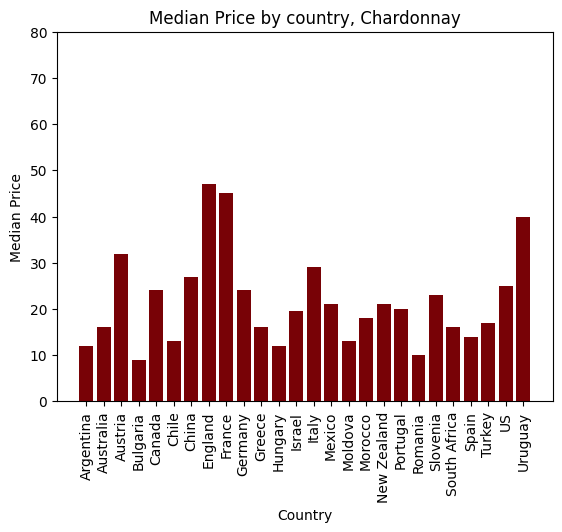

In [24]:
#Diagram 24
# Diffar pris beroende på land för de 5 vanligaste, 2.Chardonnay
plt.bar(most_common_chardonnay_grouped_price['country'],most_common_chardonnay_grouped_price['price'], color='#780206')
plt.title('Median Price by country, Chardonnay')
plt.xlabel('Country')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.ylim(0,80)
plt.show()

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/3908311680.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_cabernet_grouped_points=most_common_cabernet.groupby(['country', 'variety'])['points'].mean().reset_index()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/3908311680.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_cabernet_grouped_price=most_common_cabernet.groupby(['country', 'variety'])['price'].mean().reset_index()


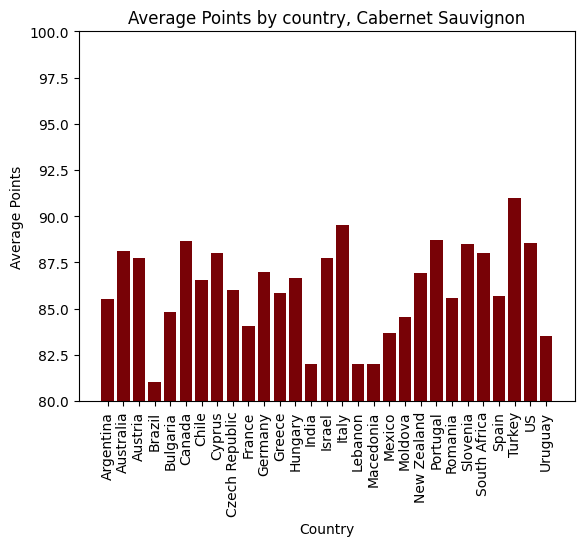

In [25]:
#Diagram 25
# Diffar poäng beroende på land för de 5 vanligaste, 3.Cabernet Sauvignon
most_common_cabernet=wine[(wine['variety']=='Cabernet Sauvignon')]
most_common_cabernet_grouped_points=most_common_cabernet.groupby(['country', 'variety'])['points'].mean().reset_index()
most_common_cabernet_grouped_price=most_common_cabernet.groupby(['country', 'variety'])['price'].mean().reset_index()
most_common_cabernet_grouped_points=most_common_cabernet_grouped_points.dropna()
most_common_cabernet_grouped_price=most_common_cabernet_grouped_price.dropna()
plt.bar(most_common_cabernet_grouped_points['country'],most_common_cabernet_grouped_points['points'], color='#780206')
plt.title('Average Points by country, Cabernet Sauvignon')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.ylim(80,100)
plt.show()

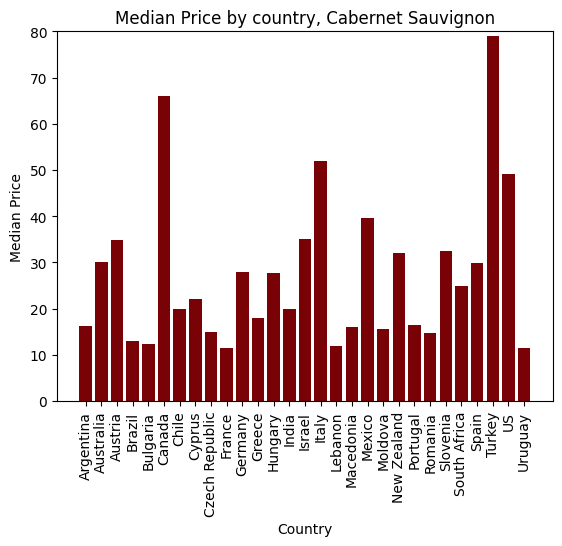

In [26]:
#Diagram 26
# Diffar pris beroende på land för de 5 vanligaste, 3.Cabernet Sauvignon
plt.bar(most_common_cabernet_grouped_price['country'],most_common_cabernet_grouped_price['price'],color='#780206')
plt.title('Median Price by country, Cabernet Sauvignon')
plt.xlabel('Country')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.ylim(0,80)
plt.show()

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/4170359247.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_red_blend_grouped_points=most_common_red_blend.groupby(['country', 'variety'])['points'].mean().reset_index()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/4170359247.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_red_blend_grouped_price=most_common_red_blend.groupby(['country', 'variety'])['price'].mean().reset_index()


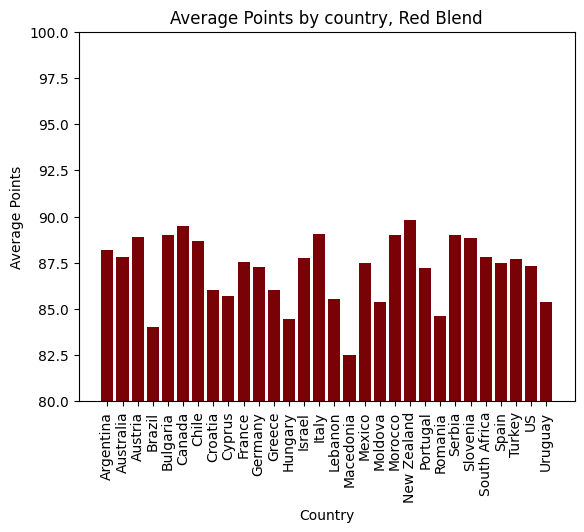

In [27]:
#Diagram 27
# Diffar poäng beroende på land för de 5 vanligaste, 4. Red Blend
most_common_red_blend=wine[(wine['variety']=='Red Blend')]
most_common_red_blend_grouped_points=most_common_red_blend.groupby(['country', 'variety'])['points'].mean().reset_index()
most_common_red_blend_grouped_price=most_common_red_blend.groupby(['country', 'variety'])['price'].mean().reset_index()
most_common_red_blend_grouped_points=most_common_red_blend_grouped_points.dropna()
most_common_red_blend_grouped_price=most_common_red_blend_grouped_price.dropna()
plt.bar(most_common_red_blend_grouped_points['country'],most_common_red_blend_grouped_points['points'], color='#780206')
plt.title('Average Points by country, Red Blend')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.ylim(80,100)
plt.show()

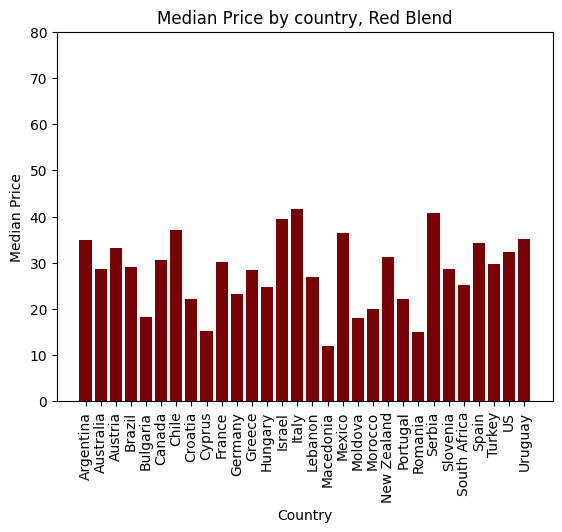

In [28]:
#Diagram 28
# Diffar pris beroende på land för de 5 vanligaste, 4. Red Blend
plt.bar(most_common_red_blend_grouped_price['country'],most_common_red_blend_grouped_price['price'],color='#780206')
plt.title('Median Price by country, Red Blend')
plt.xlabel('Country')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.ylim(0,80)
plt.show()

/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/212392648.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_bordeaux_grouped_points=most_common_bordeaux.groupby(['country', 'variety'])['points'].mean().reset_index()
/var/folders/65/pfs_43vs4fq9l0zzdnybt1r80000gn/T/ipykernel_47178/212392648.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  most_common_bordeaux_grouped_price=most_common_bordeaux.groupby(['country', 'variety'])['price'].mean().reset_index()


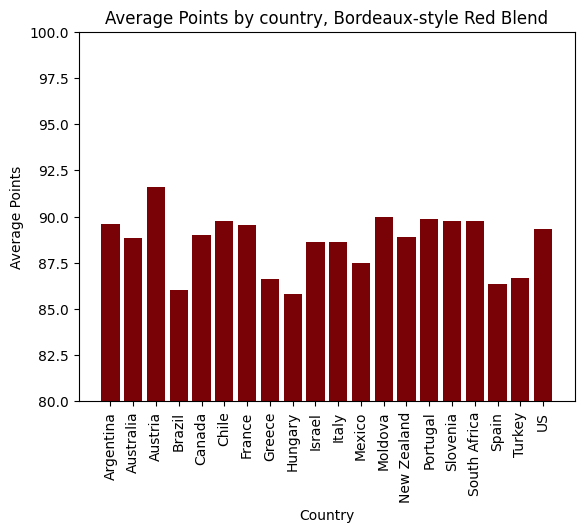

In [29]:
#Diagram 29
# Diffar poäng beroende på land för de 5 vanligaste, 5.Bordeaux-style Red Blend
most_common_bordeaux=wine[(wine['variety']=='Bordeaux-style Red Blend')]
most_common_bordeaux_grouped_points=most_common_bordeaux.groupby(['country', 'variety'])['points'].mean().reset_index()
most_common_bordeaux_grouped_price=most_common_bordeaux.groupby(['country', 'variety'])['price'].mean().reset_index()
most_common_bordeaux_grouped_points=most_common_bordeaux_grouped_points.dropna()
most_common_bordeaux_grouped_price=most_common_bordeaux_grouped_price.dropna()
plt.bar(most_common_bordeaux_grouped_points['country'],most_common_bordeaux_grouped_points['points'],color='#780206')
plt.title('Average Points by country, Bordeaux-style Red Blend')
plt.xlabel('Country')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.ylim(80,100)
plt.show()

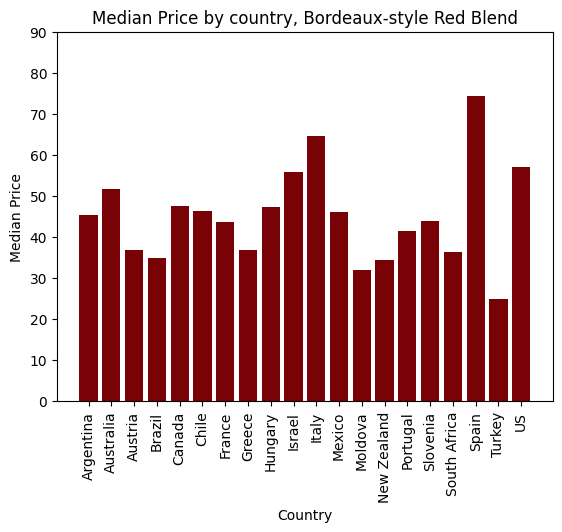

In [30]:
#Diagram 30
# Diffar pris beroende på land för de 5 vanligaste, 5.Bordeaux-style Red Blend
plt.bar(most_common_bordeaux_grouped_price['country'],most_common_bordeaux_grouped_price['price'], color='#780206')
plt.title('Median Price by country, Bordeaux-style Red Blend')
plt.xlabel('Country')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.ylim(0,90)
plt.show()